<a href="https://colab.research.google.com/github/shekhar143542/AI_Code_Reviewer/blob/main/EDAProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np

In [38]:
df=pd.read_csv("/content/vehicle_sales_dirty.csv")
df.head()

,Car_ID,Brand,Model_Year,Fuel_Type,Transmission,Seller_Type,Owner,Driven_KMs,Engine_CC,Mileage_kmpl,Selling_Price,Present_Price,Brand_dup,Selling_Price_dup
0,136,Mahindra,2019,diesel,Manual,dealer,First,149797,1547,27.47,2468431.0,328799,Mahindra,2468431.0
1,172,ford,2007,Diesel,auto,Individual,Second,198712,1085,28.03,190619.0,510679,ford,190619.0
2,223,Toyota,2012,diesel,manual,Individual,Third,177021,3005,18.80,563201.0,2848833,Toyota,563201.0
3,73,Honda,2002,NaN,Automatic,Dealer,First,54828,1640,27.58,2271388.0,1459276,Honda,2271388.0
4,152,Tata,2010,diesel,Manual,Dealer,NaN,128515,2281,25.85,1806288.0,1720392,Tata,1806288.0


In [39]:
df = df.drop(columns = ["Brand_dup", "Selling_Price_dup"], axis = 1)

In [40]:
df.head()

,Car_ID,Brand,Model_Year,Fuel_Type,Transmission,Seller_Type,Owner,Driven_KMs,Engine_CC,Mileage_kmpl,Selling_Price,Present_Price
0,136,Mahindra,2019,diesel,Manual,dealer,First,149797,1547,27.47,2468431.0,328799
1,172,ford,2007,Diesel,auto,Individual,Second,198712,1085,28.03,190619.0,510679
2,223,Toyota,2012,diesel,manual,Individual,Third,177021,3005,18.80,563201.0,2848833
3,73,Honda,2002,NaN,Automatic,Dealer,First,54828,1640,27.58,2271388.0,1459276
4,152,Tata,2010,diesel,Manual,Dealer,NaN,128515,2281,25.85,1806288.0,1720392


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_ID         285 non-null    int64  
 1   Brand          285 non-null    object 
 2   Model_Year     285 non-null    int64  
 3   Fuel_Type      285 non-null    object 
 4   Transmission   285 non-null    object 
 5   Seller_Type    285 non-null    object 
 6   Owner          285 non-null    object 
 7   Driven_KMs     285 non-null    int64  
 8   Engine_CC      285 non-null    int64  
 9   Mileage_kmpl   285 non-null    float64
 10  Selling_Price  285 non-null    float64
 11  Present_Price  285 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 26.8+ KB


In [41]:
df.isnull().sum()

,0
Car_ID,0
Brand,22
Model_Year,0
Fuel_Type,62
Transmission,81
Seller_Type,0
Owner,34
Driven_KMs,0
Engine_CC,0
Mileage_kmpl,0


In [45]:
for col in ['Brand', 'Fuel_Type', 'Transmission', 'Owner', 'Selling_Price']:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

median_price = df['Selling_Price'].median()
df['Selling_Price'].fillna(median_price, inplace=True)
df.isnull().sum()

/tmp/ipython-input-3246150884.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)
/tmp/ipython-input-3246150884.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,0
Car_ID,0
Brand,0
Model_Year,0
Fuel_Type,0
Transmission,0
Seller_Type,0
Owner,0
Driven_KMs,0
Engine_CC,0
Mileage_kmpl,0


In [11]:
df

,Car_ID,Brand,Model_Year,Fuel_Type,Transmission,Seller_Type,Owner,Driven_KMs,Engine_CC,Mileage_kmpl,Selling_Price,Present_Price,Brand_dup,Selling_Price_dup
0,136,Mahindra,2019,diesel,Manual,dealer,First,149797,1547,27.47,2468431.0,328799,Mahindra,2468431.0
1,172,ford,2007,Diesel,auto,Individual,Second,198712,1085,28.03,190619.0,510679,ford,190619.0
2,223,Toyota,2012,diesel,manual,Individual,Third,177021,3005,18.80,563201.0,2848833,Toyota,563201.0
3,73,Honda,2002,diesel,Automatic,Dealer,First,54828,1640,27.58,2271388.0,1459276,Honda,2271388.0
4,152,Tata,2010,diesel,Manual,Dealer,1st,128515,2281,25.85,1806288.0,1720392,Tata,1806288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,77,Toyota,2014,Hybrid,auto,Dealer,Second,137252,1644,12.43,679796.0,2470387,Toyota,679796.0
281,104,Mercedes,2004,diesel,Automatic,Individual,Third,128428,3129,22.36,686338.0,2044183,Mercedes,686338.0
282,195,Toyota,2018,Electric,auto,Dealer,3rd,139250,3145,13.26,2409904.0,2883890,Toyota,2409904.0
283,66,ford,2000,Diesel,auto,Individual,2nd,79217,1928,17.52,1423317.0,449891,ford,1423317.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_ID         285 non-null    int64  
 1   Brand          285 non-null    object 
 2   Model_Year     285 non-null    int64  
 3   Fuel_Type      285 non-null    object 
 4   Transmission   285 non-null    object 
 5   Seller_Type    285 non-null    object 
 6   Owner          285 non-null    object 
 7   Driven_KMs     285 non-null    int64  
 8   Engine_CC      285 non-null    int64  
 9   Mileage_kmpl   285 non-null    float64
 10  Selling_Price  285 non-null    float64
 11  Present_Price  285 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 26.8+ KB


In [47]:
df.to_csv("cleaned_vehicle_dataset.csv",index=False)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_ID         285 non-null    int64  
 1   Brand          285 non-null    object 
 2   Model_Year     285 non-null    int64  
 3   Fuel_Type      285 non-null    object 
 4   Transmission   285 non-null    object 
 5   Seller_Type    285 non-null    object 
 6   Owner          285 non-null    object 
 7   Driven_KMs     285 non-null    int64  
 8   Engine_CC      285 non-null    int64  
 9   Mileage_kmpl   285 non-null    float64
 10  Selling_Price  285 non-null    float64
 11  Present_Price  285 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 26.8+ KB


In [51]:
numerical_cols = df.select_dtypes(include=np.number)
categorical_cols = df.select_dtypes(include='object')

print("Numerical Columns:")
print(numerical_cols.head())

print("\nCategorical Columns:")
print(categorical_cols.head())

Numerical Columns:
   Car_ID  Model_Year  Driven_KMs  Engine_CC  Mileage_kmpl  Selling_Price  \
0     136        2019      149797       1547         27.47      2468431.0   
1     172        2007      198712       1085         28.03       190619.0   
2     223        2012      177021       3005         18.80       563201.0   
3      73        2002       54828       1640         27.58      2271388.0   
4     152        2010      128515       2281         25.85      1806288.0   

   Present_Price  
0         328799  
1         510679  
2        2848833  
3        1459276  
4        1720392  

Categorical Columns:
      Brand Fuel_Type Transmission Seller_Type   Owner
0  Mahindra    diesel       Manual      dealer   First
1      ford    Diesel         auto  Individual  Second
2    Toyota    diesel       manual  Individual   Third
3     Honda    diesel    Automatic      Dealer   First
4      Tata    diesel       Manual      Dealer     1st


In [55]:
#import libraries
import seaborn as sns
import matplotlib.pyplot as plt

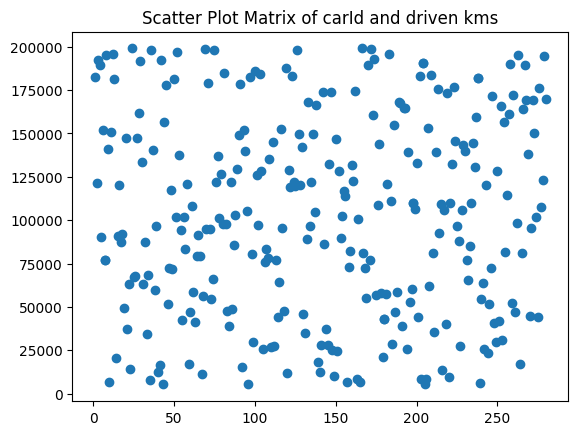

In [63]:
#scater plot
plt.scatter(df['Car_ID'],df['Driven_KMs'])
plt.title('Scatter Plot Matrix of carId and driven kms')
plt.show()

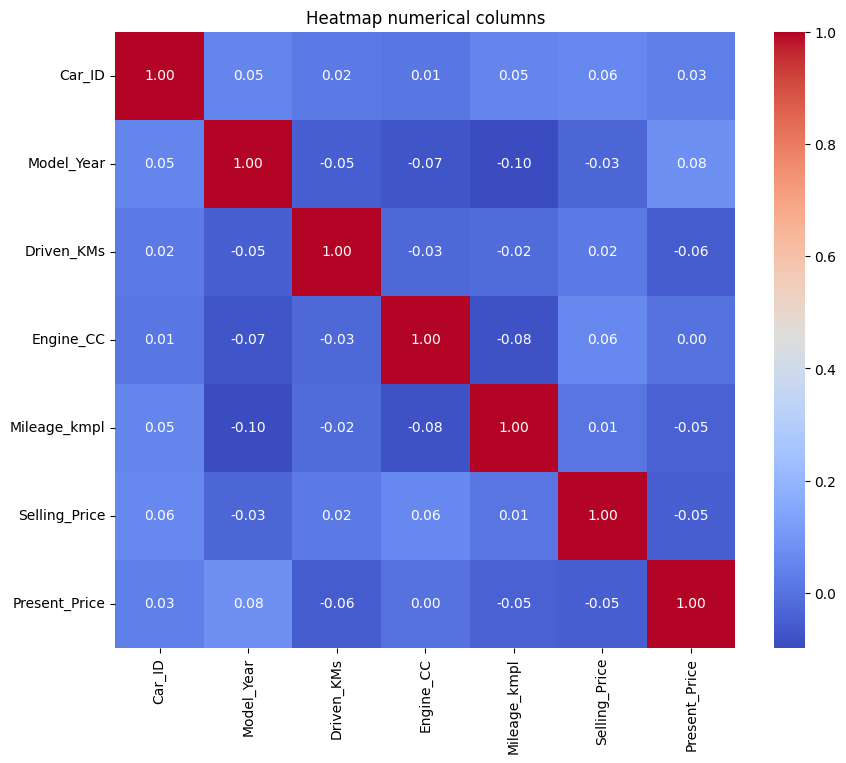

In [67]:
#heatmap
correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap numerical columns')
plt.show()

In [59]:
df.head()

,Car_ID,Brand,Model_Year,Fuel_Type,Transmission,Seller_Type,Owner,Driven_KMs,Engine_CC,Mileage_kmpl,Selling_Price,Present_Price
0,136,Mahindra,2019,diesel,Manual,dealer,First,149797,1547,27.47,2468431.0,328799
1,172,ford,2007,Diesel,auto,Individual,Second,198712,1085,28.03,190619.0,510679
2,223,Toyota,2012,diesel,manual,Individual,Third,177021,3005,18.80,563201.0,2848833
3,73,Honda,2002,diesel,Automatic,Dealer,First,54828,1640,27.58,2271388.0,1459276
4,152,Tata,2010,diesel,Manual,Dealer,1st,128515,2281,25.85,1806288.0,1720392


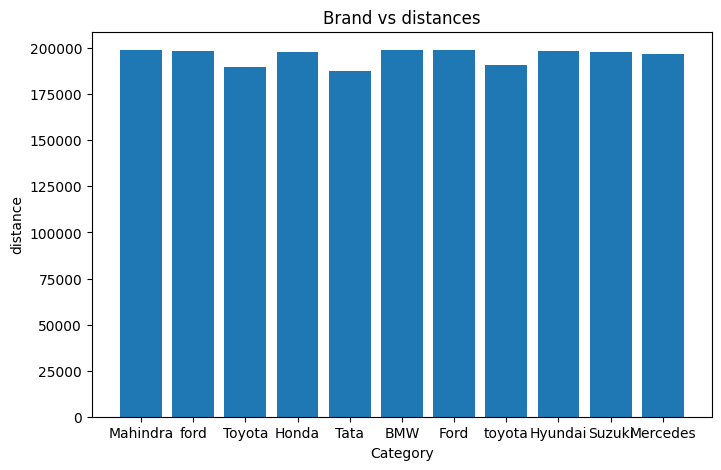

In [60]:

#bar chart
plt.figure(figsize=(8,5))
plt.bar(df['Brand'],df['Driven_KMs'])
plt.xlabel('Category')
plt.ylabel('distance')
plt.title('Brand vs distances')
plt.show()

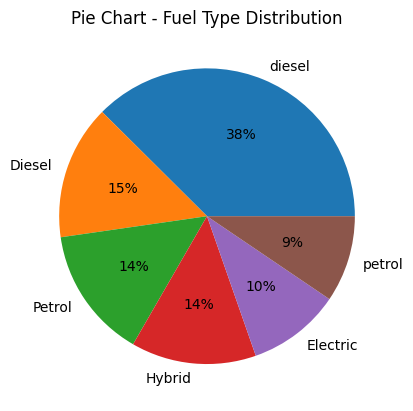

In [64]:
#pie chart
fuel_counts = df["Fuel_Type"].value_counts()
plt.pie(fuel_counts, labels=fuel_counts.index, autopct="%1.0f%%")
plt.title("Pie Chart and Fuel Type Distribution")
plt.show()

# **REPORT**



**Data Cleaning:**

Removed duplicate columns: Brand_dup and Selling_Price_dup.

**Handled missing values:**

Filled categorical columns (Brand, Fuel_Type, Transmission, Owner, Selling_Price) using their mode values.

Filled remaining Selling_Price nulls with the column’s median value.

Exported the cleaned dataset as cleaned_vehicle_dataset.csv.

**Dividing data into Numerical and categorical data:**

**Numerical Columns:** Car_ID, Model_Year, Driven_KMs, Engine_CC, Mileage_kmpl, Present_Price, Selling_Price

**Categorical Columns:** Brand, Fuel_Type, Transmission, Seller_Type, Owner

**Visual Analysis:**

**Scatter Plot (Car_ID vs Driven_KMs):**
Displays the distribution of kilometers driven across different car entries. Shows high variation, indicating diverse usage patterns among vehicles.

**Correlation Heatmap:**
Reveals relationships among numerical variables.
For example, Present_Price and Selling_Price likely show a strong positive correlation, while Model_Year may inversely relate to Driven_KMs.

**Bar Chart (Brand vs Driven_KMs):**
Highlights how distance driven varies by brand. Some brands show consistently higher usage, suggesting differences in vehicle durability or customer segment.

**Pie Chart (Fuel Type Distribution):**
Illustrates the proportion of fuel types (e.g., Petrol, Diesel, CNG). The chart helps identify the most common fuel type in the dataset.